In [47]:
import gensim
gensim.__version__

'3.6.0'

In [3]:
!pip install konlpy

# 한국어 패키지


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 48.0 MB/s eta 0:00:00


## 영어 전처리

In [49]:
import nltk
nltk.download('punkt')

# nltk 설치

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


# ted 영상 스크립트 텍스트 데이터 불러오기 / request를 통해 url 불러옴

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f9c18624ee0>)

In [6]:
# 파일을 연 후 UTF8로 encoding 진행
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)


In [7]:

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))
for line in parse_text[:10]:
    print(line)

# xpath가 context/text()인 text값만 불러옴 / context 태그 내의 값만 불러옴

H
e
r
e
 
a
r
e
 
t


In [8]:

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

for line in content_text[:10]:
    print(line)

H
e
r
e
 
a
r
e
 
t


In [9]:

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

for line in sent_text[:10]:
    print(line)

# 문장 토큰화는 토큰의 단위를 문장으로 하여, 코퍼스 내 텍스트를 문장 단위로 구분하는 작업을 의미한다.

# 문장단위로 구분할때는 기본적으로 .?! 등을 기준으로 한다. 하지만 적절한 문장 토큰화를 위해 
# 문장 흐름에 따른 예외처리를 반영한 sent_tokenize를 활용할 수 있다.

# 시간 많이 걸림

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.
Both are necessary, but it can be too much of a good thing.
Consider Facit.
I'm actually old enough to remember them.
Facit was a fantastic company.
They were born deep in the Swedish forest, and they made the best mechanical calculators in the world.
Everybody used them.
And what did Facit do when the electronic calculator came along?
They continued doing exactly the same.


In [10]:
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

In [11]:

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

# 문장을 단어 형태로 토큰화 진행

In [12]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273380


In [13]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [15]:
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

# 단어 벡터 간 유의미한 유사도를 반영함. 단어의 의미를 수치화한다.

# 단어의 의미를 다차원 공간에 벡터화하는 방법을 사용하는데 이러한 표현을 분산 표현이라고 함
# 그리고 분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업을 워드 임베딩(embedding)이라 부르며 
# 이렇게 표현된 벡터를 임베딩 벡터(embedding vector)라고 한다.

# 분포 가설은 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다' 라는 가정이다.

# 분산 표현은 분포 가설을 이용하여 텍스트를 학습하고,
# 단어의 의미를 벡터의 여러 차원에 분산하여 표현한다.

# 따라서 모든 단어를 0 1로 표현한 원-핫 벡터보다 저차원에서 표현 가능하다.
# 설정된 차원 수를 가진 벡터에서 각 차원이 어떤 실수값을 갖느냐에 따라 단어가 표현된다.



> sg = 0이므로 CBOW 학습방식을 적용한다.

- CBOW는 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법이다. 반대로, Skip-Gram은 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법이다. 

- window는 중심단어를 예측하기 위해서 앞 뒤 몇개 단어를 볼 것 인지 범위를 의미한다. 

- min_count를 통해 빈도가 적은 단어는 학습하지 않는다. -> 문맥에 상관없음, 유사도 분석에 활용x

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

In [ ]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

## 한국어 word2vec


In [ ]:
!pip install konlpy

# 한국어 패키지


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [21]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fed563cac70>)

In [22]:
train_data = pd.read_table('ratings.txt')

# read_table txt 파일을 불러옴

In [8]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [9]:
print('리뷰 개수 :',len(train_data))

리뷰 개수 : 200000


In [10]:
print('NULL 값 존재 유무 :', train_data.isnull().values.any())

NULL 값 존재 유무 : True


In [11]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [27]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('NULL 값 존재 유무 :', train_data.isnull().values.any()) # Null 값이 존재하는지 확인

NULL 값 존재 유무 : False


In [28]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-28-d10eedfa8951>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [29]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [30]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [31]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence) # 제거된 문장을 리스트에 저장

100%|██████████| 199992/199992 [10:15<00:00, 324.67it/s]


In [32]:
print(tokenized_data[:3])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


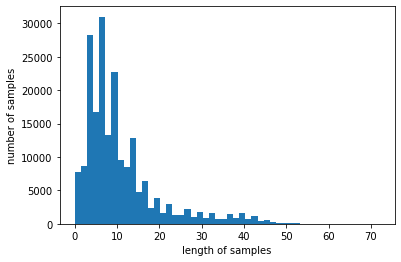

In [33]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
from gensim.models import Word2Vec

In [35]:
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# word2vec 변환

In [36]:
print('완성된 임베딩 매트릭스의 크기 확인 :', model.wv.vectors.shape)

완성된 임베딩 매트릭스의 크기 확인 : (16477, 100)


In [37]:
print(model.wv.most_similar("최민식"))

[('이민호', 0.8698610663414001), ('한석규', 0.8529040813446045), ('김명민', 0.8490172624588013), ('채민서', 0.8409234881401062), ('안성기', 0.8391441702842712), ('조재현', 0.836877703666687), ('엄태웅', 0.8351849913597107), ('엄정화', 0.8340668678283691), ('이정재', 0.8318854570388794), ('송강호', 0.8315140604972839)]


In [38]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8751798868179321), ('무협', 0.8516353964805603), ('호러', 0.8470181822776794), ('느와르', 0.824812114238739), ('무비', 0.8247960209846497), ('물', 0.8202828168869019), ('블록버스터', 0.8152594566345215), ('로코', 0.8002026081085205), ('정통', 0.7964675426483154), ('헐리우드', 0.794869601726532)]


In [39]:
print(model.wv.most_similar("발연기"))

[('어색', 0.7704898118972778), ('조연', 0.7640693783760071), ('연기력', 0.7504240870475769), ('연기', 0.7491307258605957), ('발음', 0.7437247633934021), ('사투리', 0.7245389223098755), ('미스캐스팅', 0.7000079154968262), ('케미', 0.6929788589477539), ('주연', 0.6919568181037903), ('중견', 0.690926730632782)]


## 사전 훈련된 word2vec

In [40]:
import gensim
import urllib.request

In [ ]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# error 발생
# drive에서 사전 훈련된 word2vec을 다운 받은 후 적용할 수 있음
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [ ]:
print(word2vec_model.vectors.shape)

In [ ]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

In [ ]:
print(word2vec_model['book'])